In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('data (2).csv', parse_dates=['Дата'])
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [61]:
print('Размер датасета:', df.shape)
df.info()
print('Количество пропущенных значений в каждом столбце:')
print(df.isnull().sum())

Размер датасета: (301355, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
Количество пропущенных значений в каждом столбце:
Дата            0
Склад           0
Контрагент      0
Номенклатура    0
Количество      0
dtype: int64


Сразу переведем столбец "Дата" в правильный формат

In [62]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [5]:
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


In [63]:
df.describe()

,Дата,Склад,Количество
count,301355,301355.000000,301355.000000
mean,2018-05-03 18:58:36.652453632,2.900652,2.951559
min,2018-01-04 00:00:00,1.000000,0.000000
25%,2018-03-03 00:00:00,2.000000,1.000000
50%,2018-05-04 00:00:00,3.000000,2.000000
75%,2018-07-04 00:00:00,4.000000,4.000000
max,2018-08-31 00:00:00,5.000000,200.000000
std,NaN,1.352221,2.998154


Сгруппируйте данные по дате, посчитайте количество продаж

In [ ]:
grouped_df = ...

In [64]:
grouped_df = df.groupby('Дата').size()
sales_sum = df.groupby('Дата')['Количество'].sum()

print(grouped_df)
print(sales_sum)

Дата
2018-01-04    1840
2018-01-05    1301
2018-01-06    1306
2018-01-07    1322
2018-01-09    1719
              ... 
2018-08-26    1462
2018-08-28    1731
2018-08-29    1497
2018-08-30    1445
2018-08-31    1366
Length: 205, dtype: int64
Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


Вывести несколько первых строк сгруппированных данных

In [65]:
grouped_df = df.groupby('Дата').size()
print(grouped_df.head())

Дата
2018-01-04    1840
2018-01-05    1301
2018-01-06    1306
2018-01-07    1322
2018-01-09    1719
dtype: int64


Нарисуйте график продаж у `grouped_df`  

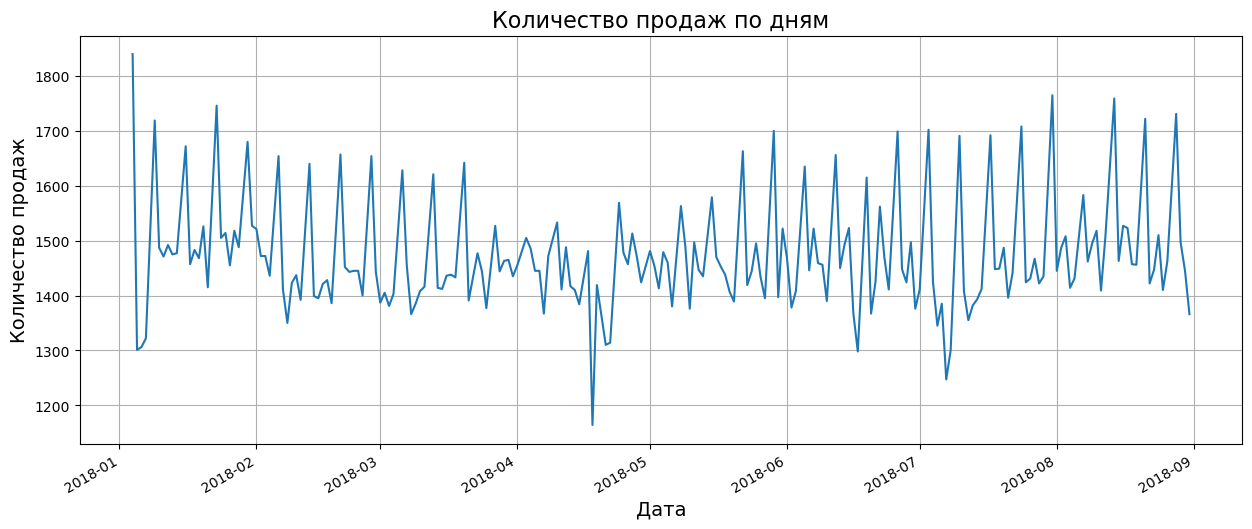

In [66]:
plt.figure(figsize=(15, 6))   
grouped_df.plot()
plt.title('Количество продаж по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
На  графике видно, как изменялось количество продаж по дням в период с начала января 2018 года до конца августа 2018 года.
Вид графика  волнообразный:  подъёмы  и спады в объёмах продаж.
Очевидная  регулярная периодичность   примерно раз в 5–7 дней происходит резкое снижение количества продаж. 
Это может быть связано с выходными днями, когда торговая активность традиционно падает.
После каждого падения снова наблюдается рост, что отражает более активные продажи в будние дни.
В среднем за день фиксируется от 1300 до 2000 продаж, что можно считать устойчивым уровнем активности.
В отдельные дни продажи значительно превышают 2000 единиц. Эти всплески, скорее всего, связаны с акционными мероприятиями, 
скидками или особенными событиями.
Минимальные значения количества продаж опускаются до 500–800 в день. Такие провалы могут быть обусловлены праздниками или 
выходными, когда снижается потребительская активность.
В начале года продажи были несколько ниже.
Начиная с весны (март–апрель), наблюдается постепенный рост продаж.
К концу августа уровень продаж остаётся стабильным и высоким, без резких скачков.

Выводы:
Продажи имеют выраженный циклический характер — увеличиваются в будни и снижаются в выходные.
На протяжении года можно заметить умеренный рост средней дневной активности.
На графике отчётливо видны как пики активности (распродажи, события), так и спады (выходные и праздники).

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [67]:
max_sales = df['Количество'].max()
print(f"Максимальное количество продаж в одной записи: {max_sales}")

max_sales_row = df[df['Количество'] == max_sales]
print("\nСтрока с максимальным выбросом по количеству продаж:")
print(max_sales_row)

Максимальное количество продаж в одной записи: 200

Строка с максимальным выбросом по количеству продаж:
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [68]:
summer_months = df[df['Дата'].dt.month.isin([6, 7, 8])]
wednesday_sales = summer_months[summer_months['Дата'].dt.weekday == 2]
warehouse_3_sales = wednesday_sales[wednesday_sales['Склад'] == 3]
product_sales = warehouse_3_sales.groupby('Номенклатура')['Количество'].sum()
top_product = product_sales.idxmax()
top_product_sales = product_sales.max()
print(f"Топовый товар: {top_product}")
print(f"Количество продаж: {top_product_sales}")

Топовый товар: product_1
Количество продаж: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [69]:
weather_df = pd.read_excel('погода астана 01-08.2018.xlsx', skiprows=6)
weather_df.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN


In [77]:
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'])
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], dayfirst=True)
weather_df['Дата'] = weather_df['Местное время в Астане'].dt.date
temperature_by_day = weather_df.groupby('Дата')['T'].mean().reset_index()
print(temperature_by_day.head())

         Дата        T
0  2018-01-01  -9.4625
1  2018-01-02  -9.5125
2  2018-01-03 -11.4625
3  2018-01-04 -14.0750
4  2018-01-05 -16.8625


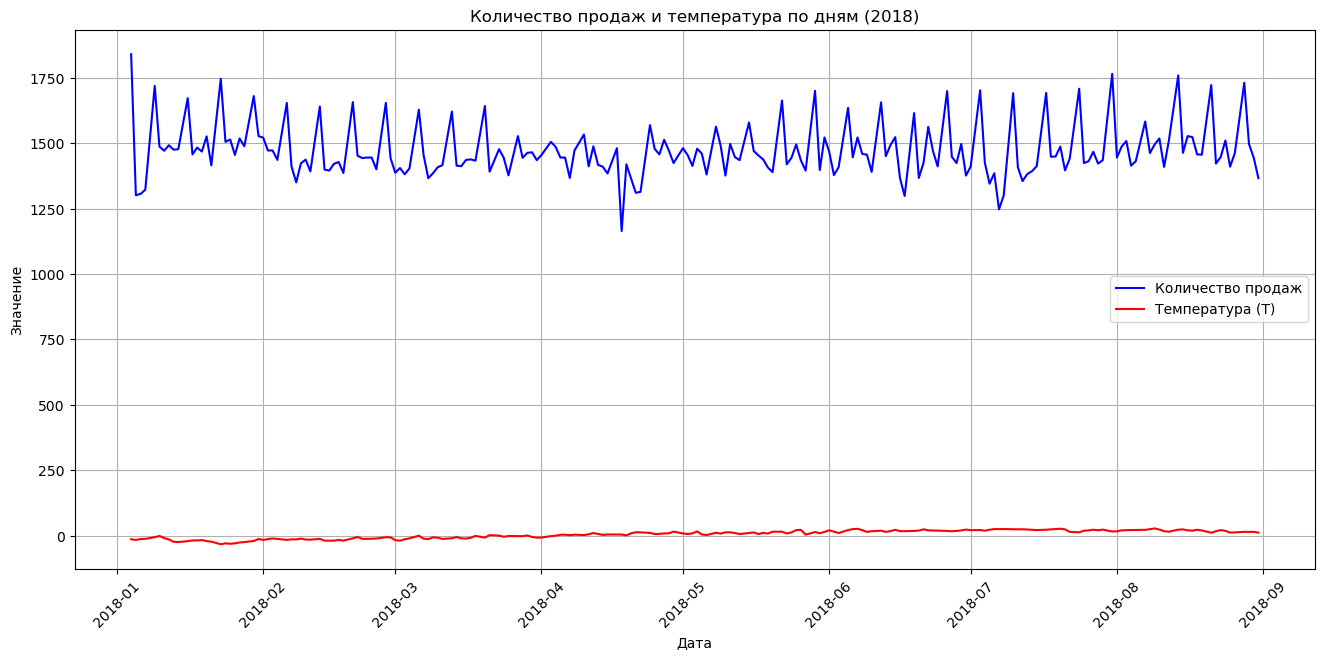

In [79]:
grouped_df = grouped_df.reset_index().rename(columns={0: 'Количество продаж'})
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])
temperature_by_day['Дата'] = pd.to_datetime(temperature_by_day['Дата'])

final_df = pd.merge(grouped_df, temperature_by_day, on='Дата', how='left')

plt.figure(figsize=(16, 7))
plt.plot(final_df['Дата'], final_df['Количество продаж'], label='Количество продаж', color='blue')
plt.plot(final_df['Дата'], final_df['T'], label='Температура (T)', color='red')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Количество продаж и температура по дням (2018)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
График не информативный , не читабельный, поэтому создаем  вторую ось У

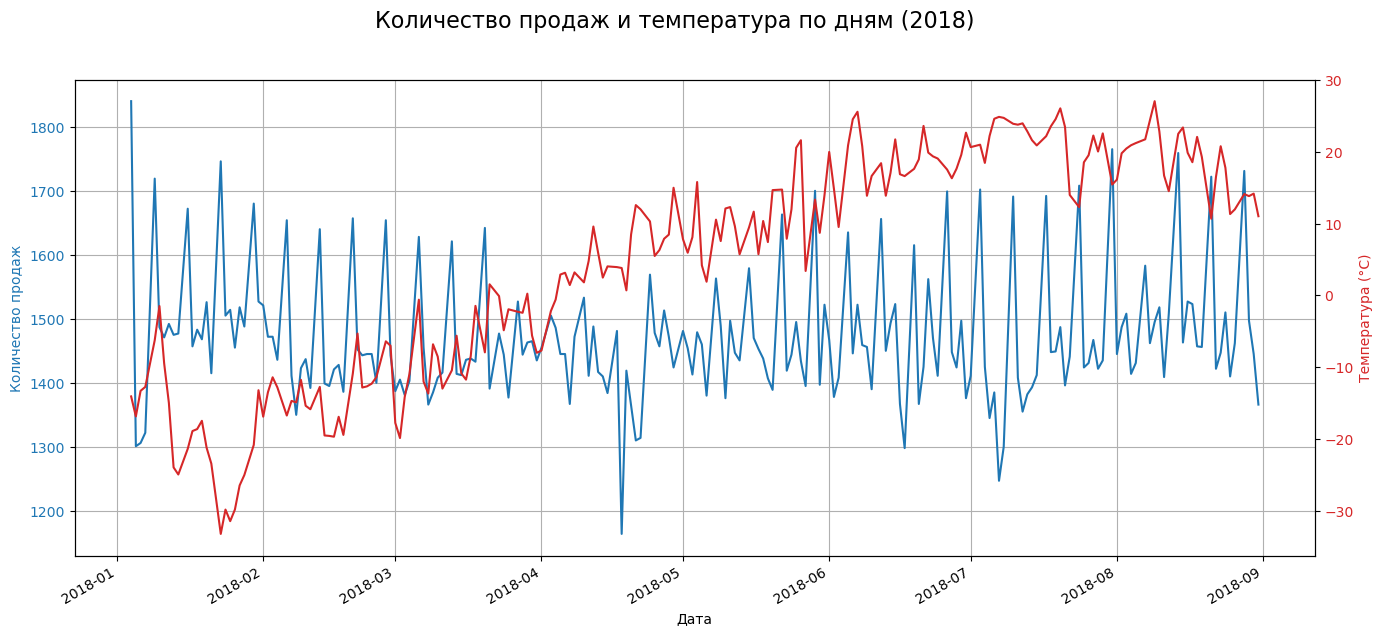

In [80]:
fig, ax1 = plt.subplots(figsize=(16, 7))

color = 'tab:blue'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color=color)
ax1.plot(final_df['Дата'], final_df['Количество продаж'], color=color, label='Количество продаж')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Температура (°C)', color=color)
ax2.plot(final_df['Дата'], final_df['T'], color=color, label='Температура (T)')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Количество продаж и температура по дням (2018)', fontsize=16)
fig.autofmt_xdate()  
plt.show()

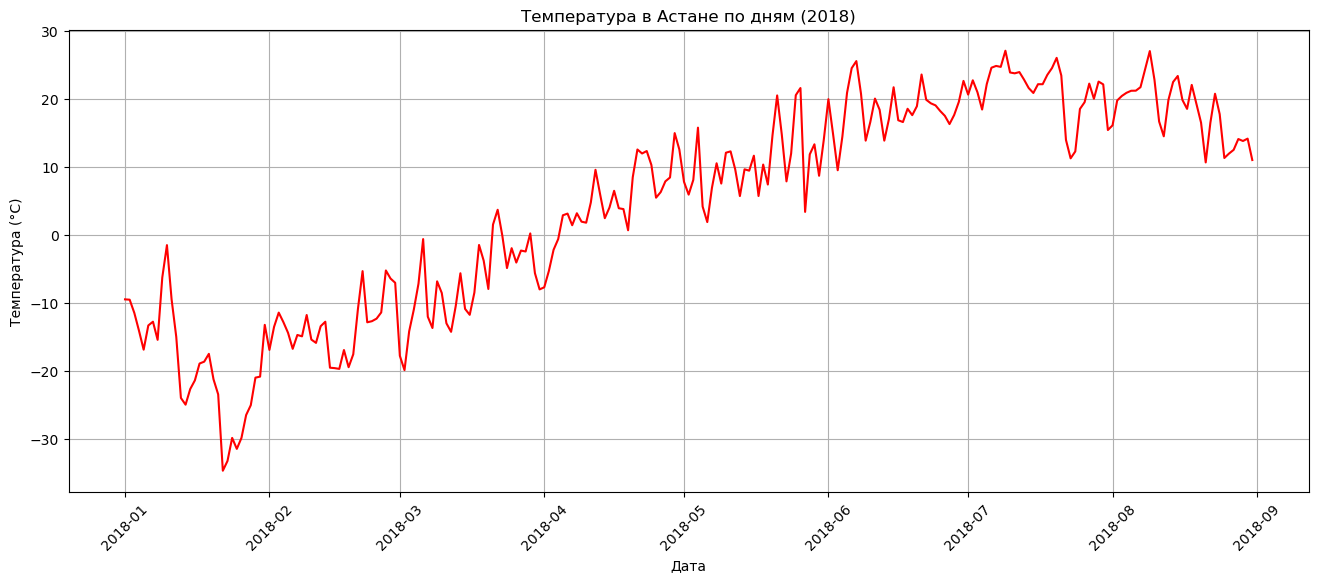

In [86]:
plt.figure(figsize=(16, 6))
plt.plot(temperature_by_day['Дата'], temperature_by_day['T'], color='red')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура в Астане по дням (2018)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()